<a href="https://colab.research.google.com/github/carlosasenciom/SIM_YAC_ASENCIO_UPSE2023/blob/main/DIA2.3_SIMULADOR_DIFUSIVIDAD_POZOINYECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simulador ecuacion de la difusividad 
import numpy as np
import math
L=1000 #distancia total 
dx=100 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inical de Presiones vectores de 1
print(P01)

[1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
PYac=4000
PFrontd=0 #Frontera derecha
PFronti=5500 #Frontera izquierda
Tiempo=200000
DT=100
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [ ]:
PXX.shape

(2000, 11)

In [ ]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
P0in=P01 #Condicion inicial 
Pdt=P01 #Vector de resultados dt
t=DT #primera interaccion

In [ ]:
print(P01)

[5500 4000 4000 4000 4000 4000 4000 4000 4000 4000    0]


In [ ]:
#calculos matematico de un punto
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax*deltax))*deltat)+P2

In [ ]:
PXX[0]=P01
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [ ]:
PXX

array([[5500., 4000., 4000., ..., 4000., 4000.,    0.],
       [5500., 4015., 4000., ..., 4000., 3960.,    0.],
       [5500., 4029., 4000., ..., 3999., 3920.,    0.],
       ...,
       [5500., 4950., 4400., ..., 1100.,  550.,    0.],
       [5500., 4950., 4400., ..., 1100.,  550.,    0.],
       [5500., 4950., 4400., ..., 1100.,  550.,    0.]])

In [ ]:
PXX.shape

(2000, 11)

In [ ]:
Distance.shape

(11,)

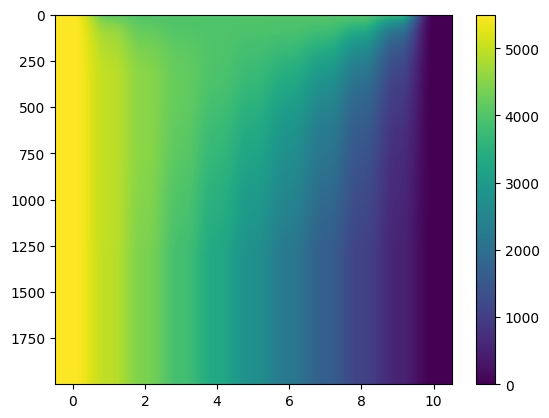

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PXX,aspect='auto')
plt.colorbar()

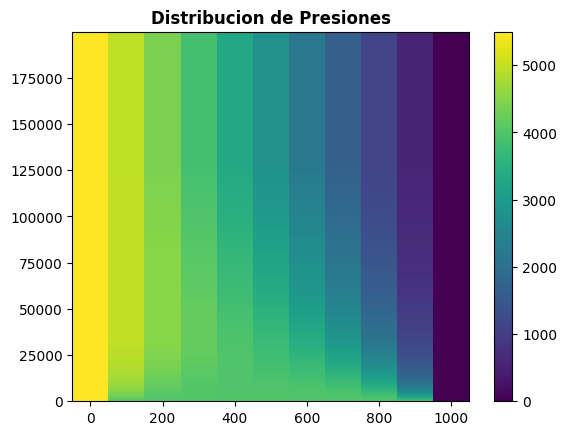

In [ ]:
c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Distribucion de Presiones', fontweight ="bold")
plt.show()